In [1]:
import math
import matplotlib.pyplot as plt
from pendulum_sim import Params, simulate
from ship_excitement import compute_ship_kinematics
from detect_phases import detect_phases
# === 参数 ===
p = Params(
    m=250.0, L=24.0, g=9.81,
    kappa0=0, c_t=10.0,
    F0=3000.0,
    theta_on_deg=10.0,
    theta_target_deg=60.0,
    dt=0.002, t_max=180.0,

    n_hits=20, hit_decay=0.95, F0_min_frac=0.80,
    peak_eps_deg=0.5,
    theta_tol_deg=0.2, omega_tol_deg=0.2,
    quiet_time=5.0,
    
    brake_after_hits=20,           
    theta_brake_on_deg=10.0,
    F_brake0=400.0,
    omega_eps=0.05,
    theta_eps_deg=0.3,
    stall_timeout=60.0,
    stall_cycles=4,
    theta0_deg=0.0,
    omega0_deg=0.0
)

res = simulate(p)
ship_data = compute_ship_kinematics(res, L_d=18.0)
phases = detect_phases(res)


# print(res.keys())







L' = 25.632 m, θ' = 20.556°
=== Phase timing (fixed by first-hit logic) ===
Phase 1: 0.00  → 18.15 s  (dur 18.15s)
Phase 2: 18.15 → 123.18 s  (dur 105.03s)
Phase 3: 123.18 → 180.00 s  (dur 56.82s)


/var/folders/bd/jk9wyxrj49z6k61ztw6s9p080000gn/T/ipykernel_29548/2739568954.py:57: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.18)


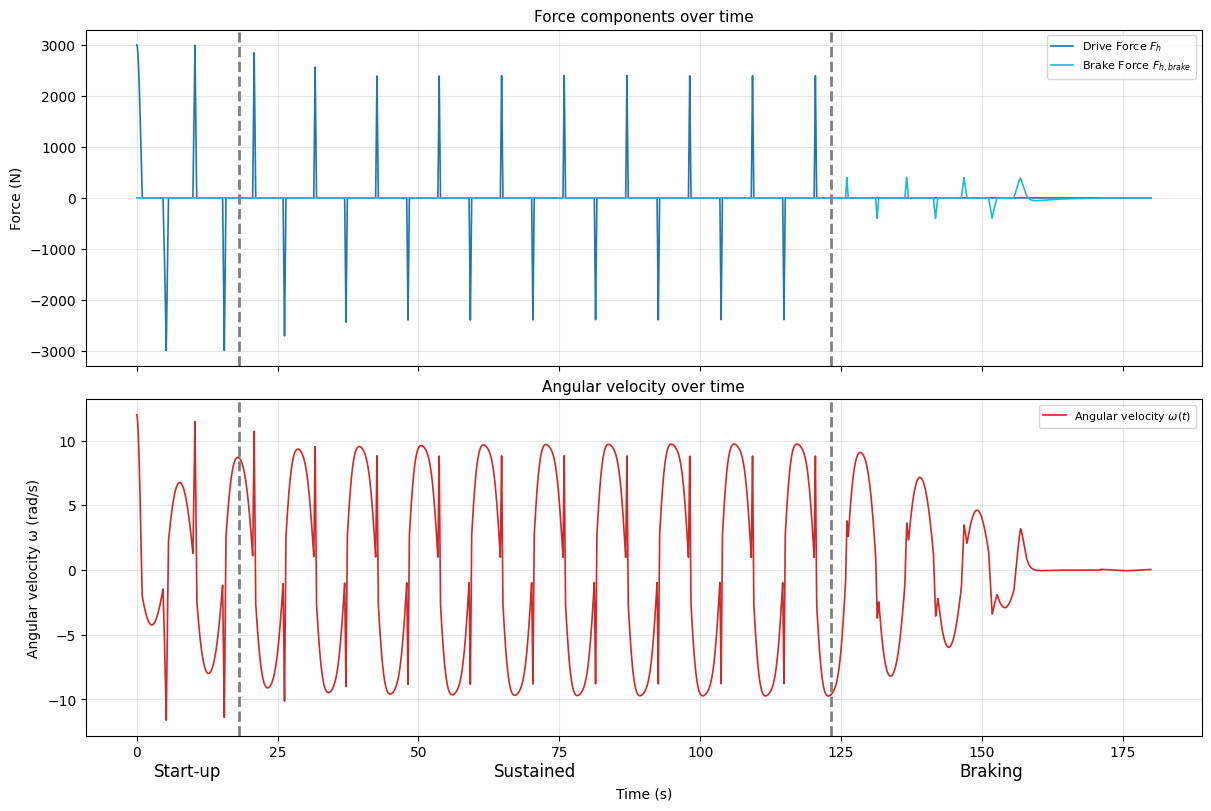

In [2]:
import matplotlib.pyplot as plt

# === 从仿真结果中提取数据 ===
T = res["T"]
Fh = res["Fh"]
Fh_brake = res["Fh_brake"]
Fh_total = res["Fh_total"]
omega = res["omega"]

# === 阶段边界 ===
t1 = phases["phase1_end"]
t2 = phases["phase2_end"]
t_end = phases["phase3_end"]

# === 创建两个子图 ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, constrained_layout=True)

# ------------------- (1) 上图：力曲线 -------------------
ax1 = axes[0]
ax1.plot(T, Fh, label='Drive Force $F_h$', color='C0', linewidth=1.2)
ax1.plot(T, Fh_brake, label='Brake Force $F_{h,brake}$', color='C9', linewidth=1.2)


# 阶段虚线
ax1.axvline(x=t1, color='gray', linestyle='--', linewidth=2)
ax1.axvline(x=t2, color='gray', linestyle='--', linewidth=2)

ax1.set_title("Force components over time", fontsize=11)
ax1.set_ylabel("Force (N)")
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(alpha=0.3)

# ------------------- (2) 下图：角速度 -------------------
ax2 = axes[1]
ax2.plot(T, res["a_t"], color='C3', label=r'Angular velocity $\omega(t)$', linewidth=1.2)

# 阶段虚线（保持一致）
ax2.axvline(x=t1, color='gray', linestyle='--', linewidth=2)
ax2.axvline(x=t2, color='gray', linestyle='--', linewidth=2)

# === 阶段标签放在 x 轴下方 ===
y_min, y_max = ax2.get_ylim()
y_label = y_min - 0.08 * (y_max - y_min)

ax2.text(t1 / 2, y_label, "Start-up", ha='center', va='top', fontsize=12, color='black')
ax2.text((t1 + t2) / 2, y_label, "Sustained", ha='center', va='top', fontsize=12, color='black')
ax2.text((t2 + t_end) / 2, y_label, "Braking", ha='center', va='top', fontsize=12, color='black')

ax2.set_title("Angular velocity over time", fontsize=11)
ax2.set_xlabel("Time (s)")
ax2.xaxis.labelpad = 20   # 单位是像素，默认大约是 5-10
ax2.set_ylabel("Angular velocity ω (rad/s)")
ax2.legend(loc='upper right', fontsize=8)
ax2.grid(alpha=0.3)

# === 调整留白 ===
fig.subplots_adjust(bottom=0.18)
plt.show()


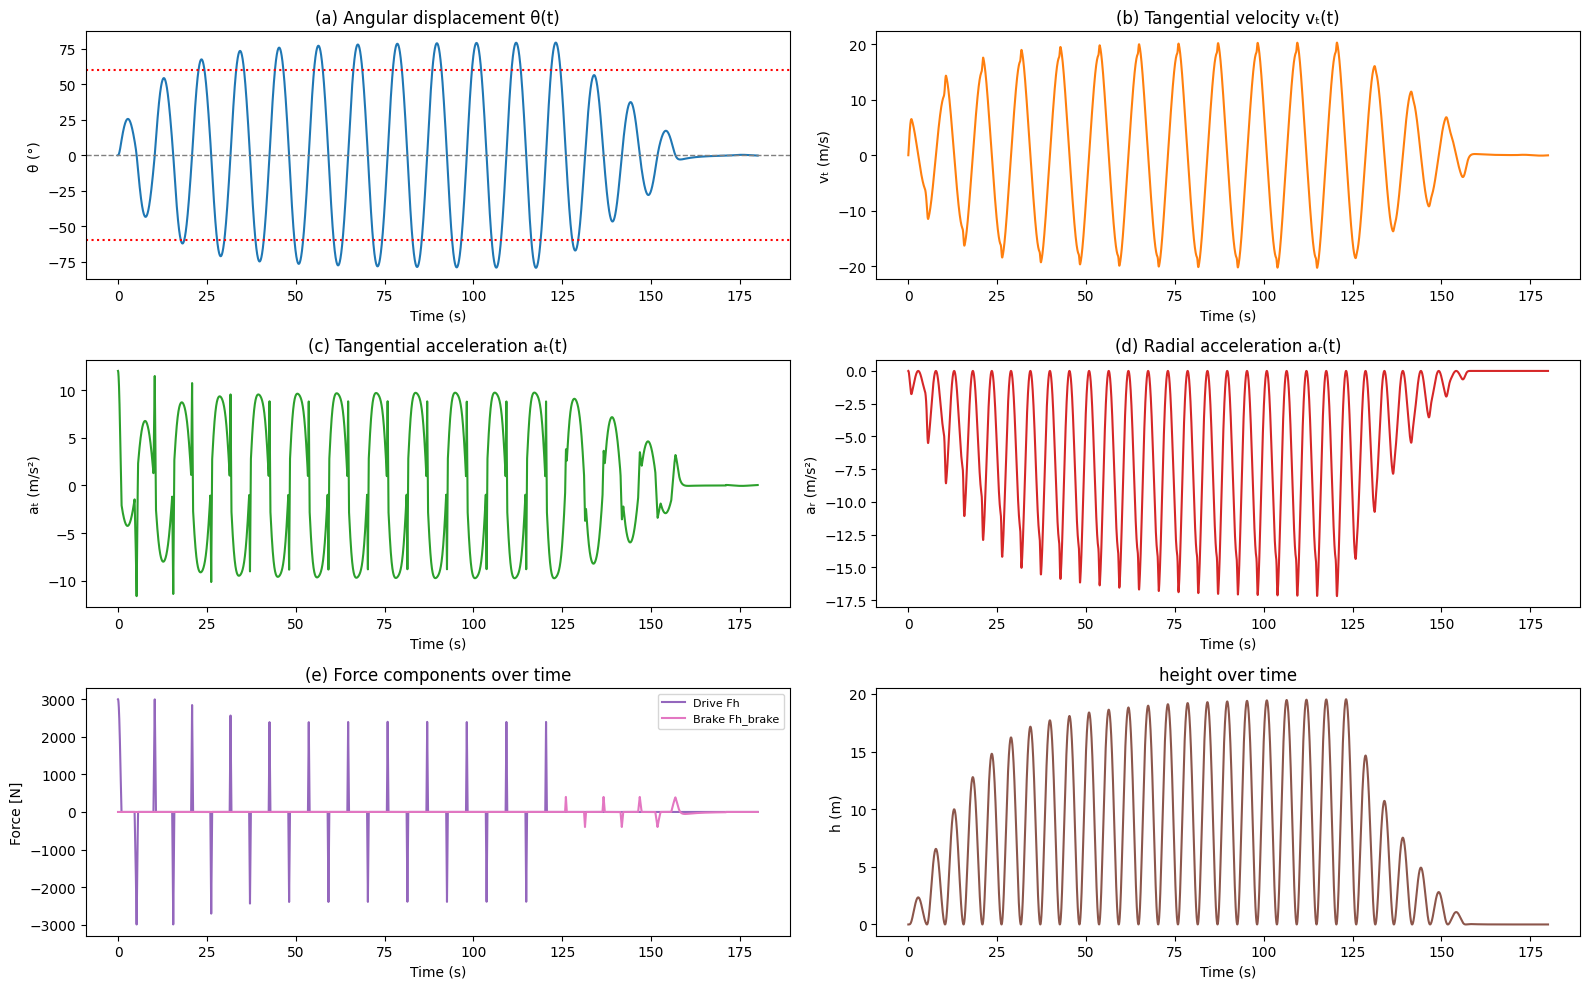

In [19]:
# === 画图 ===

T = res["T"]
theta_deg = res["theta_deg"]
v_t = res["v_t"]
a_t = res["a_t"]
a_r = res["a_r"]
omega = res["omega"]
h = res["h"]
Fh = res["Fh"]
Fh_brake = res["Fh_brake"]
Fh_total = res["Fh_total"]
# === 创建 3x2 子图 ===
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
axes = axes.flatten()  # 展平成一维数组方便索引

# (1,1) 角度
axes[0].plot(T, theta_deg, color='C0')
axes[0].axhline(0, linestyle='--', linewidth=1, color='gray')
axes[0].axhline(p.theta_target_deg, linestyle=':', color='r')
axes[0].axhline(-p.theta_target_deg, linestyle=':', color='r')
axes[0].set_title("(a) Angular displacement θ(t)")
axes[0].set_ylabel("θ (°)")

# (1,2) 切向速度
axes[1].plot(T, v_t, color='C1')
axes[1].set_title("(b) Tangential velocity vₜ(t)")
axes[1].set_ylabel("vₜ (m/s)")

# (2,1) 切向加速度
axes[2].plot(T, a_t, color='C2')
axes[2].set_title("(c) Tangential acceleration aₜ(t)")
axes[2].set_ylabel("aₜ (m/s²)")

# (2,2) 径向加速度
axes[3].plot(T, a_r, color='C3')
axes[3].set_title("(d) Radial acceleration aᵣ(t)")
axes[3].set_ylabel("aᵣ (m/s²)")

# (3,1) 力分量
axes[4].plot(T, Fh, label='Drive Fh', color='C4')
axes[4].plot(T, Fh_brake, label='Brake Fh_brake', color='C6')
# axes[4].plot(T, Fh_total, label='Total Fh_total', linestyle='--', color='black')
axes[4].set_title("(e) Force components over time")
axes[4].set_ylabel("Force [N]")
axes[4].legend(loc='upper right', fontsize=8)

# (3,2) 角速度或高度（可二选一）
axes[5].plot(T, h, color='C5')
axes[5].set_title("height over time")
axes[5].set_ylabel("h (m)")

# 统一 x 轴标签
for ax in axes:
    ax.set_xlabel("Time (s)")

plt.tight_layout()
plt.show()



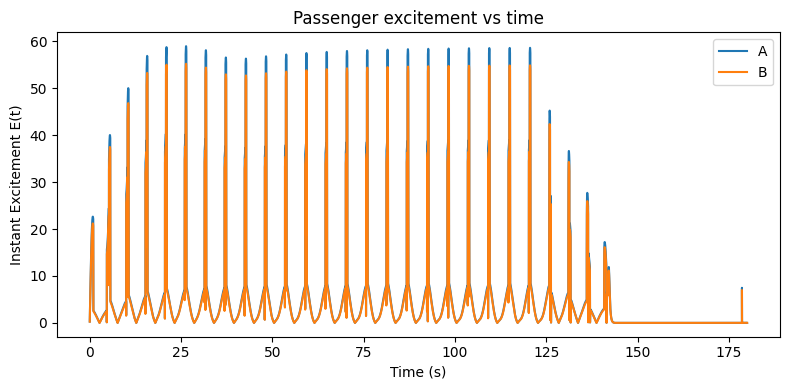

In [10]:
# 绘图示例
T = ship_data["T"]
plt.figure(figsize=(8,4))
plt.plot(T, ship_data["j_tot_A"], label="A")
plt.plot(T, ship_data["j_tot_B"], label="B")
# plt.plot(T, ship_data["E_cum_A"], label="A")
# plt.plot(T, ship_data["E_cum_B"], label="B")

plt.xlabel("Time (s)")
plt.ylabel("Instant Excitement E(t)")
plt.title("Passenger excitement vs time")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/bd/jk9wyxrj49z6k61ztw6s9p080000gn/T/ipykernel_23096/2695561056.py:70: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.18)


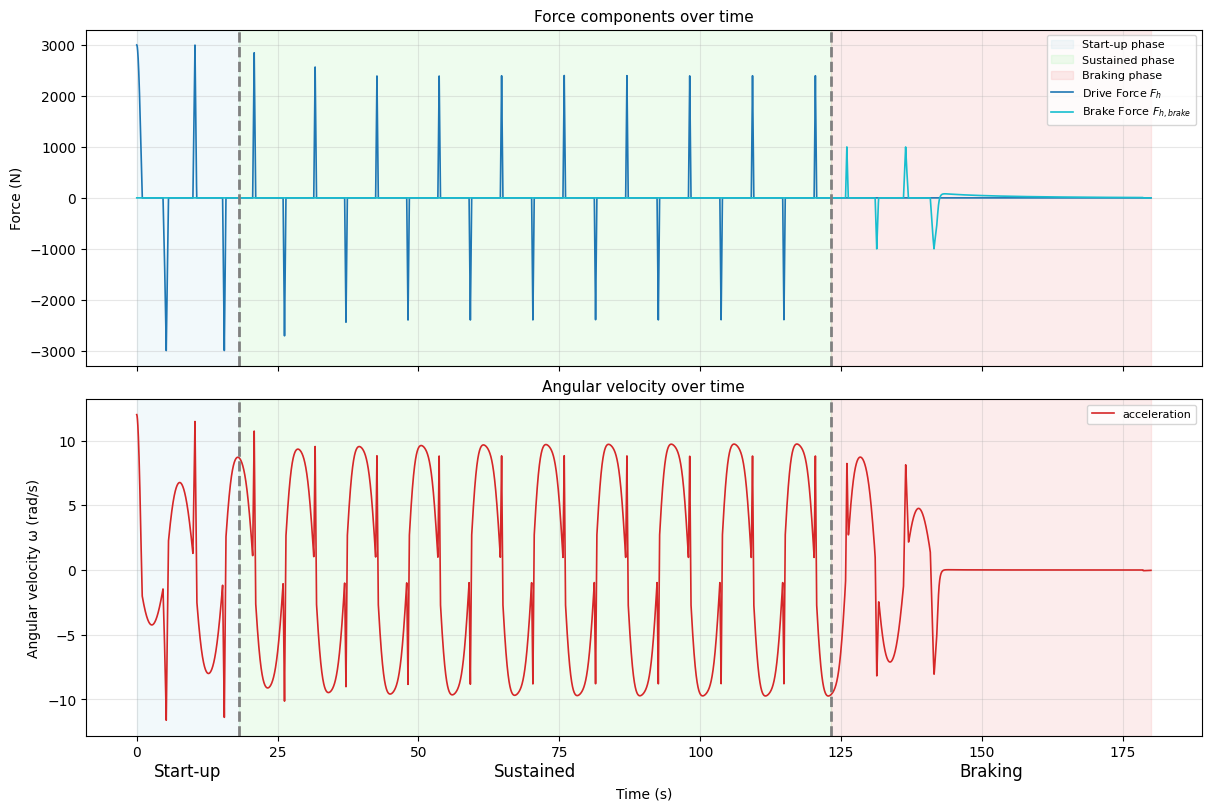

In [ ]:
import matplotlib.pyplot as plt

# === 从仿真结果中提取数据 ===
T = res["T"]
Fh = res["Fh"]
Fh_brake = res["Fh_brake"]
Fh_total = res["Fh_total"]
omega = res["omega"]

# === 阶段边界 ===
t1 = phases["phase1_end"]
t2 = phases["phase2_end"]
t_end = phases["phase3_end"]

# === 创建两个子图 ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, constrained_layout=True)

# ------------------- (1) 上图：力曲线 -------------------
ax1 = axes[0]

# 阶段背景填色
ax1.axvspan(0, t1, color='lightblue', alpha=0.15, label='Start-up phase')
ax1.axvspan(t1, t2, color='lightgreen', alpha=0.15, label='Sustained phase')
ax1.axvspan(t2, t_end, color='lightcoral', alpha=0.15, label='Braking phase')

# 力曲线
ax1.plot(T, Fh, label='Drive Force $F_h$', color='C0', linewidth=1.2)
ax1.plot(T, Fh_brake, label='Brake Force $F_{h,brake}$', color='C9', linewidth=1.2)

# 阶段虚线
ax1.axvline(x=t1, color='gray', linestyle='--', linewidth=2)
ax1.axvline(x=t2, color='gray', linestyle='--', linewidth=2)

ax1.set_title("Driving Force over time", fontsize=11)
ax1.set_ylabel("Driving Force (N)")
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(alpha=0.3)

# ------------------- (2) 下图：角速度 -------------------
ax2 = axes[1]

# 阶段背景填色（与上图一致）
ax2.axvspan(0, t1, color='lightblue', alpha=0.15)
ax2.axvspan(t1, t2, color='lightgreen', alpha=0.15)
ax2.axvspan(t2, t_end, color='lightcoral', alpha=0.15)

# 角速度曲线
ax2.plot(T, res["a_t"], color='C3', label=r'acceleration', linewidth=1.2)

# 阶段虚线
ax2.axvline(x=t1, color='gray', linestyle='--', linewidth=2)
ax2.axvline(x=t2, color='gray', linestyle='--', linewidth=2)

# === 阶段标签放在 x 轴下方 ===
y_min, y_max = ax2.get_ylim()
y_label = y_min - 0.08 * (y_max - y_min)

ax2.text(t1 / 2, y_label, "Start-up", ha='center', va='top', fontsize=12, color='black')
ax2.text((t1 + t2) / 2, y_label, "Sustained", ha='center', va='top', fontsize=12, color='black')
ax2.text((t2 + t_end) / 2, y_label, "Braking", ha='center', va='top', fontsize=12, color='black')

ax2.set_title("Angular velocity over time", fontsize=11)
ax2.set_xlabel("Time (s)")
ax2.xaxis.labelpad = 20
ax2.set_ylabel("Angular velocity ω (rad/s)")
ax2.legend(loc='upper right', fontsize=8)
ax2.grid(alpha=0.3)

# === 调整留白 ===
fig.subplots_adjust(bottom=0.18)
plt.show()


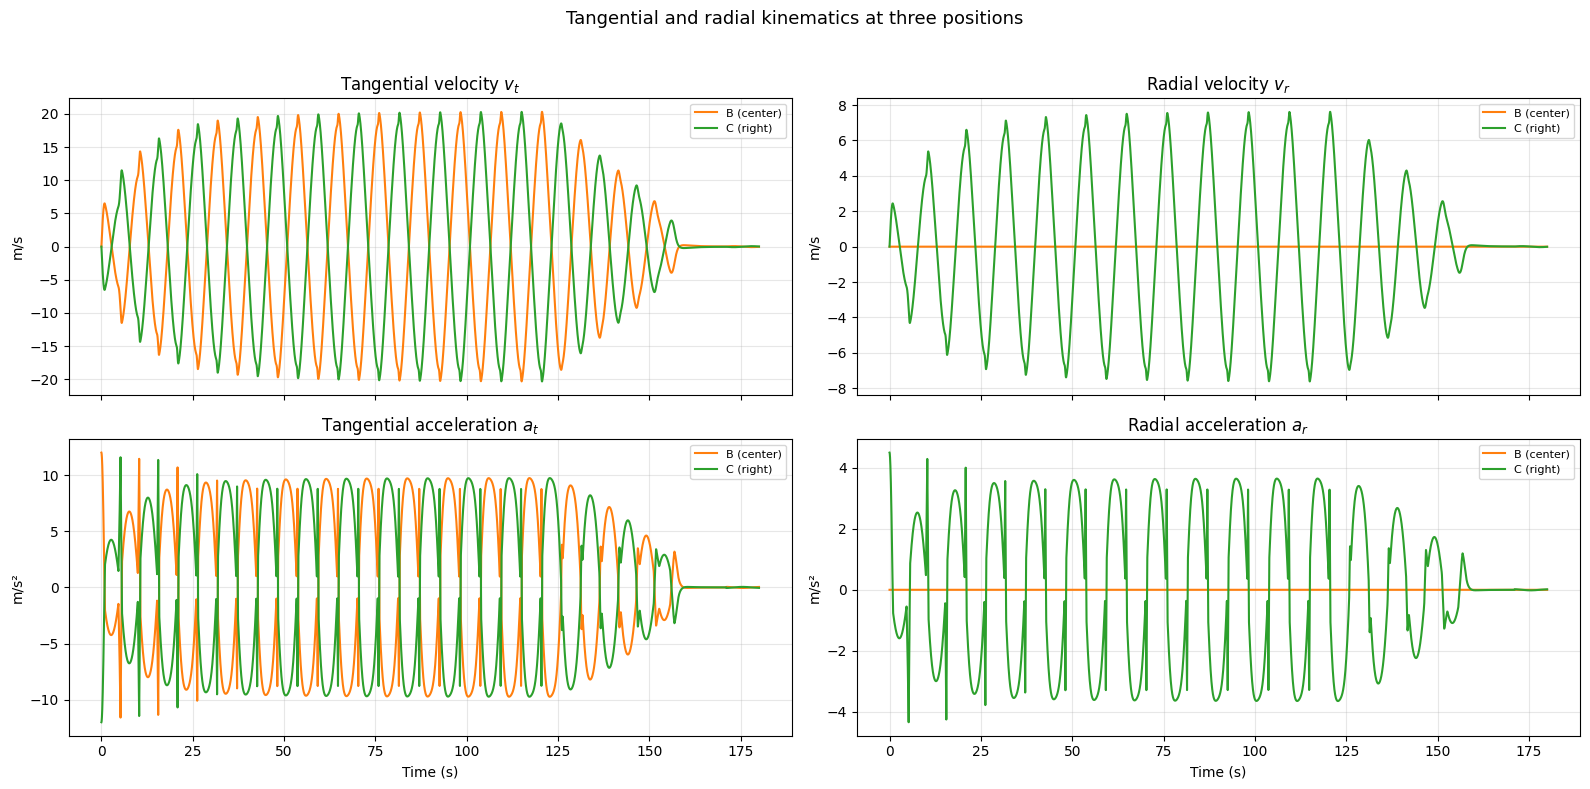

In [18]:
import matplotlib.pyplot as plt

# === 从 ship_data 中提取变量 ===
T = ship_data["T"]

# 速度分量
v_t_A, v_t_B, v_t_C = ship_data["v_t_A"], ship_data["v_t_B"], ship_data["v_t_C"]
v_r_A, v_r_B, v_r_C = ship_data["v_r_A"], ship_data["v_r_B"], ship_data["v_r_C"]

# 加速度分量
a_t_A, a_t_B, a_t_C = ship_data["a_t_A"], ship_data["a_t_B"], ship_data["a_t_C"]
a_r_A, a_r_B, a_r_C = ship_data["a_r_A"], ship_data["a_r_B"], ship_data["a_r_C"]

# === 创建 2×2 布局 ===
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True)
axes = axes.flatten()

# ------------------ (1) 切向速度 ------------------
# axes[0].plot(T, v_t_A, label='A (left)', color='C0')
axes[0].plot(T, v_t_B, label='B (center)', color='C1')
axes[0].plot(T, v_t_C, label='C (right)', color='C2')
axes[0].set_title("Tangential velocity $v_t$")
axes[0].set_ylabel("m/s")
axes[0].legend(fontsize=8)
axes[0].grid(alpha=0.3)

# ------------------ (2) 径向速度 ------------------
# axes[1].plot(T, v_r_A, label='A (left)', color='C0')
axes[1].plot(T, v_r_B, label='B (center)', color='C1')
axes[1].plot(T, v_r_C, label='C (right)', color='C2')
axes[1].set_title("Radial velocity $v_r$")
axes[1].set_ylabel("m/s")
axes[1].legend(fontsize=8)
axes[1].grid(alpha=0.3)

# ------------------ (3) 切向加速度 ------------------
# axes[2].plot(T, a_t_A, label='A (left)', color='C0')
axes[2].plot(T, a_t_B, label='B (center)', color='C1')
axes[2].plot(T, a_t_C, label='C (right)', color='C2')
axes[2].set_title("Tangential acceleration $a_t$")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("m/s²")
axes[2].legend(fontsize=8)
axes[2].grid(alpha=0.3)

# ------------------ (4) 径向加速度 ------------------
# axes[3].plot(T, a_r_A, label='A (left)', color='C0')
axes[3].plot(T, a_r_B, label='B (center)', color='C1')
axes[3].plot(T, a_r_C, label='C (right)', color='C2')
axes[3].set_title("Radial acceleration $a_r$")
axes[3].set_xlabel("Time (s)")
axes[3].set_ylabel("m/s²")
axes[3].legend(fontsize=8)
axes[3].grid(alpha=0.3)

# === 总体美化 ===
plt.suptitle("Tangential and radial kinematics at three positions", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
